In [1]:
using BeamLib: IsotropicArray, steerphi, bartlett
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])

# test signal generation
Θ = deg2rad.([10, 80])
d = length(Θ)
fs = 8e3
t = transpose(0:1/fs:1)
s1 = sin.(2π*t*300)
s2 = cos.(2π*t*400)

s = steerphi(pa, fc, Θ[1]).*s1 + steerphi(pa, fc, Θ[2]).*s2
n = (0.1/sqrt(2))*(randn(size(s)) + 1im*randn(size(s)))
X = s + n
Rxx = 1/size(X)[2] * X*X'

# Bartlett spectrum 
# Same as steering dsb_weights
# but using the bartlett function is more convenient for
# DoA estimation
ϕaxis = LinRange(-90, 90, 360)
P = bartlett.(Ref(pa), Ref(Rxx), Ref(fc), deg2rad.(ϕaxis))

360-element Vector{Float64}:
 8.449407757903227
 8.44918366179941
 8.448509510753087
 8.44737971930121
 8.445784987498335
 8.443712314729412
 8.441145019194096
 8.438062763207647
 8.43444158450341
 8.430253933760431
 ⋮
 8.455520353335526
 8.452259334975372
 8.449375562135
 8.44689373869995
 8.444834740139038
 8.44321562699556
 8.442049656305986
 8.441346290717595
 8.44111120512767

In [2]:
# Find DoAs
import Peaks
ϕaxis[Peaks.findmaxima(P).indices]

2-element Vector{Float64}:
 10.779944289693589
 76.46239554317549

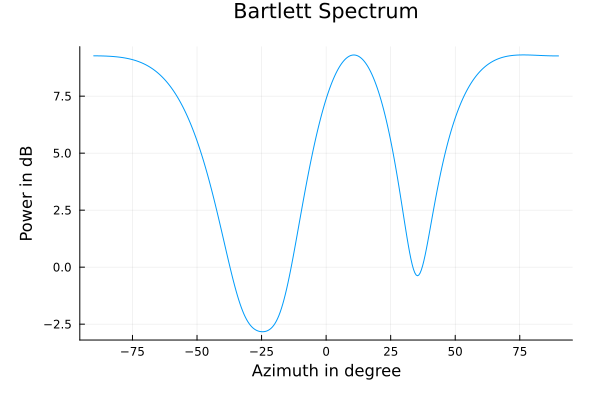

In [3]:
using Plots
import Measures
p1 = plot(ϕaxis, 10*log10.(P))
plot!(title="Bartlett Spectrum", legend = false, margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")